<h2> Análise de componentes principais </h2>
<hr>
<p style="text-alingn:justify">
    A análise de componentes principais ou PCA (Principal Component Analysis), é uma técnica de aprendizagem de máquina não supervisionada, utilizada para a redução da dimensionalidade. 
    <hr>
    PCA transforma os possíveis atributos correlacionados em um conjunto de atributos linearmente não correlacionado chamado <strong>componentes principias</strong>.
    <hr>
    Neste repositório, feito a aplicação de PCA para reduzir a dimensão do conjunto de dados pokemon. 
    <hr>
</p>

In [1]:
#importar dependências 
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
#carregar o conjunto de dados utilizando a biblioteca pandas 
pokemon_df = pd.read_csv('data/pokemon.csv')
#ler as primeiras cinco linhas do conjunto de dados
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<p style ="text-align:justify">
    <hr>
    O PCA é um bom ponto de partida para analisar dados complexos. A técnica modela um subespaço linear de dados, pela captura dos atributos num conjunto de dados com maior variabilidade. 
    <hr>
    O primeiro passo em PCA é encontrar a média dos dados, depois procura a direção com a maior variação. Esta direção é um <strong>vetor de componentes principais</strong>. O próximo <strong>componente principal</strong> é a direção ortgonal que tem a próxima maior variância e assim por diante. 
    <hr>
<img src="imagens/img01.png">
</p>
<p style ="text-align:justify">
    <hr>
    PCA tem muitas aplicações práticos, icluindo a redução do número de atributos, para aplicações que exige uso intensivo dos recursos do processador e também redução de ruído. 
    <hr>
    O PCA é sensível ao valor extremo mas, para este conjunto de dados, os atributos estão normalizado.
    <hr>
</p>

In [3]:
#para o conjunto de dados acima, apenas considera os seguintes atributos
df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [4]:
#resumo estatísca descritiva
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<h2 style="text-align:justify">
    Redução de dimensionalidade 
</h2>
<hr>

In [5]:
#importar as dependencias de PCA do scikit-learn
from sklearn.decomposition import PCA

In [6]:
#criar o modelo
pca = PCA(n_components=2, svd_solver='full')

In [7]:
#reduzir a dimensão do conjunto de dados
pca.fit(df)

PCA(n_components=2, svd_solver='full')

In [8]:
#transformar o conjunto de dados em dois dimensões
T = pca.transform(df)

In [9]:
#comparar os resultados 
print(f"Dimensão original:{df.shape}")
print(f"Dimensão reduzida:{T.shape}")

Dimensão original:(800, 6)
Dimensão reduzida:(800, 2)


In [10]:
print(f"Dataset transformado:\n{T}")

Dataset transformado:
[[-45.86072754  -5.38443151]
 [-11.15293667  -5.80561951]
 [ 36.94600862  -5.23612965]
 ...
 [ 75.99988475 -27.27078641]
 [114.0967126  -36.87056714]
 [ 72.88355049  15.15261625]]


<p style="text-align:justify">
    <hr>
    Podemos usar o método <strong>explained_variance_ratio_</strong> do objeto <strong>pca</strong> para ver quanto da variação no conjunto de dados é explicado por cada um dos vetores de componenetes principais.
    <hr>
</p>

In [11]:
pca.explained_variance_ratio_

array([0.46096131, 0.18752145])

In [12]:
pca.explained_variance_ratio_.sum()

0.6484827653819597

<p style="text-align:justify">
    <hr>
       Assim, apenas com <strong>dois componentes principais</strong> podem representar quase <strong>65%</strong> da
       variação dos 6 atributos.
    <hr>
</p>

<h2> Interpretar os componentes </h2>
<p style="text-align:justify"> 
    <hr>
    Podemos acessar as correlações entre os componentes e as variáveis originais usando o método <strong>components_</strong> do objeto <strong>pca</strong>.
    <hr>
    A interpretação destas componentes depende de encontrar os componentes mais altamente correlacionados (para este exemplo, feito um corte de 0,45).
    <hr>
    </p>

In [13]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=[1,2])
components

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,0.300808,0.492892,0.380635,0.508981,0.394370,0.327263
2,0.042210,0.076545,0.695216,-0.383311,0.173894,-0.576079


<p style="text-align:justify"> 
<hr>
Assim, para o primeiro componente principal, <strong>Attack</strong> e <strong>Sp. Atk</strong> são mais significativos. Portanto, este componente principal está bem correlacionado com <strong>Sp. Atk</strong>. Portanto, o pokemon do primeiro componente principal tem alto poder de <strong>Attack</strong> e <strong>Sp. Atk </strong>.
<hr>
Para o segundo componente principal, <strong> Attack </strong> e <strong>Sp. Atk </strong> é proporcional ao <strong>Defense</strong> e inversamente proporcional na <strong>Sp. Atk </strong>. Portanto, o pokemon do segundo componente principal tem alto <strong>Defense</strong> e baixo <strong>Speed</strong>.
<hr>
</p>

<h2>Descobrir os atributos mais importantes </h2>
<hr>

In [14]:
import math 

def get_important_features(transformed_features, components_, columns):
    """
    está função retornará o atributo mais importante, para que possamos
    determinar quais atributos têm mais efeito na escala multi-dimensional
    """
    num_columns = len(columns)
    
    """
    escalar os componentes principais pelo valor máximo em o conjunto
    transformado pertencente a esse componente
    """
    xvector = components_[0]*max(transformed_features[:,0])
    yvector = components_[1]*max(transformed_features[:,1])
    
    """
    usa uma seta para projetar cada atributo orginal com um label 
    de vetor em seus eixos dos componentes principais 
    """
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns)}
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print(f"Atributos e suas importâncias:\n{important_features}")
    
get_important_features(T, pca.components_, df.columns.values)    

Atributos e suas importâncias:
[(143.6241995215177, 'Defense'), (119.74350606922017, 'Speed'), (105.831139583613, 'Sp. Atk'), (76.0228156117881, 'Attack'), (68.17904342534248, 'Sp. Def'), (46.24128335926665, 'HP')]


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    

    num_columns = len(columns)

   
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
   
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

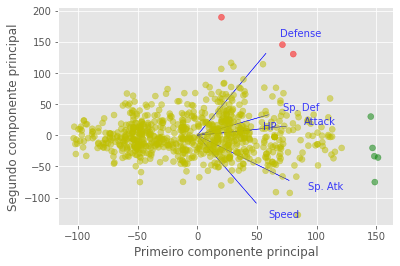

In [16]:
ax = draw_vectors(T, pca.components_, df.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1','component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal') 
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

<p style="text-align:justify">
     <hr>
 Podemos observar pelo gráfico que, todos os componentes são positivos no primiero componente principal, mas a velocidade e ataque especial no segundo componente principal são negativos. Seus comprimentos retratam suas magnitudes.
     <hr>
 Os pokemons em verde tem alto poder de ataque e alto ataque especial para  o primeiro componente principal.
     <hr>
 Os pokemons em vermelho tem alto poder de defesa e baixa velocidade para o segundo componente principal.
     <hr>
 Os pokemons que tem alto poder de ataque e alto poder de ataque especial são os pokemons lendários.
     <hr>
<p>

<h2> Pokemons com alto poder de ataque e alto poder de ataque especial.</h2>
    <hr>

In [17]:
(pokemon_df.loc[T_df[T_df['color']=='g'].index])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


<h2> Pokemons com alto poder de defesa e baixa velocidade.</h2>
    <hr>

In [18]:
(pokemon_df.loc[T_df[T_df['color']=='r'].index])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
